# Program - plot 2D vector plot using matplotlib

**Purpose**


**Content**
- set up a test 2D data
- vector


**Author:** Yi-Hsuan Chen (yihsuan@umich.edu)

**Date:** August 9, 2023

**Reference program:**

- matplotlib.pyplot.quiver
  - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html

- matplotlib.pyplot.quiverkey
  - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiverkey.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yhc_module as yhc

## Set data

In [2]:
# Generate some data for the vector field
x = np.linspace(-2, 2, 5)
y = np.linspace(100, 1000, 4)
X, Y = np.meshgrid(x, y)

U = np.zeros_like(X)
V = np.zeros_like(Y)


## Define functions

### def plot_vc

In [3]:
def plot_vc(ax,  
            X_2d, Y_2d, U_2d, V_2d, short_note, 
            angles, scale_units, scale, color='b',  
            key_x = 0, key_y = 1400, key_length = 2, coordinates = 'data', width=0.01,
              ):
    
    #--- create a vector plot
    plot_vc = ax.quiver(X_2d, Y_2d, U_2d, V_2d, angles=angles, scale_units=scale_units, scale=scale, color=color, width=width)
    
    #--- create the reference vector symbol
    key_title = f"Ref: {key_length}"
    plot_vc_ref = ax.quiverkey(plot_vc, key_x, key_y, key_length, key_title, coordinates=coordinates, color='k')

    #---
    ax.grid()
    ax.set_xlim(-5,5)
    ax.set_ylim(0,1500)
    title = f"angles=[{angles}], scale_units=[{scale_units}], scale=[{scale}]. {short_note}"
    ax.set_title(title)

## Plot

### angles='xy'; scale_units='xy'; scale=1 
- vector lengths consistent with XY coordinates.
- adjust vector width by changing width, e.g. width=0.02
- DO NOT USE scale_units='width', which doesn't make any sense.
- Set scale=1, otherwise this would cause confusion (the length of vector is not consistent with the axes)

 ------------- 
 U
[[ 0.   0.   0.5  0.   0. ]
 [ 2.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.   0.   0. ]]

 ------------- 
 V
[[ 0.   0.  -2.   0.   0. ]
 [ 1.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.5  0. ]
 [ 0.   0.   0.   0.   0. ]]



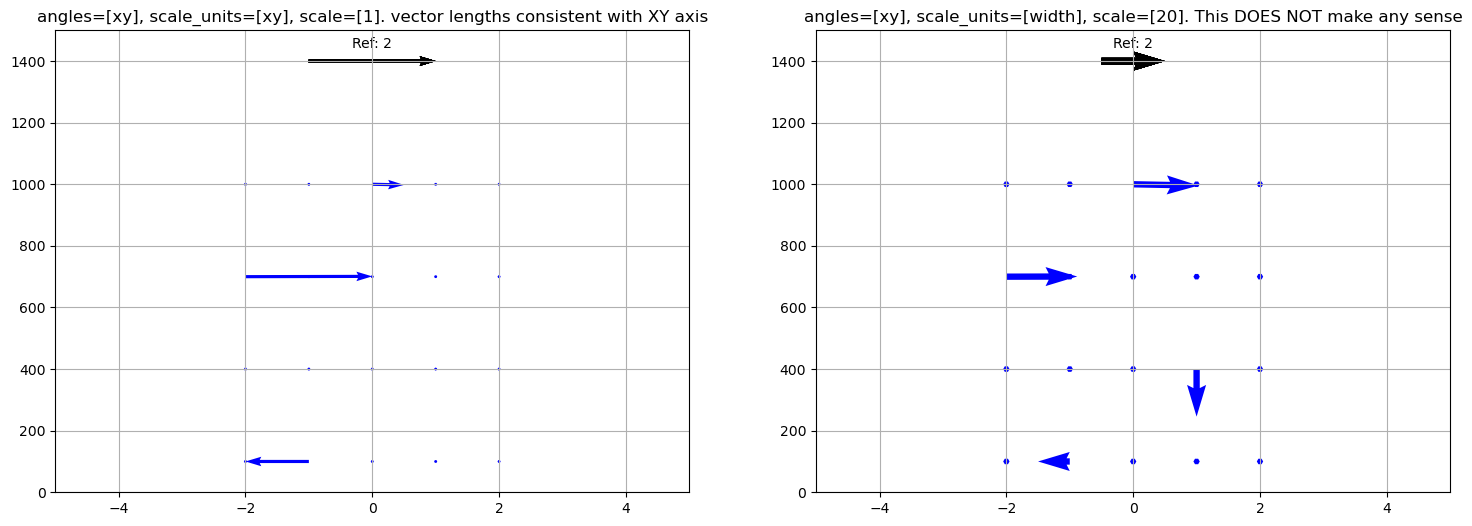

In [6]:
#--- set data
U = np.zeros_like(X)
V = np.zeros_like(Y)
U[2,0] = 2; U[3,2] = 0.5 ; U[1,3]=0;  U[0,1]=-1
V[2,0] = 1; V[3,2] = -2; V[1,3]=-1.5; V[0,1]=0 

#--- plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))   # 2 row, 1 column

#--- ax1
short_note = "vector lengths consistent with XY axis"
angles='xy'; scale_units='xy'; scale=1; width=0.005
plot_vc (ax1, X, Y, U, V, short_note=short_note, angles=angles, scale_units=scale_units, scale=scale, width=width)

#--- ax2
short_note = "This DOES NOT make any sense"
angles='xy'; scale_units='width'; scale=20
plot_vc (ax2, X, Y, U, V, short_note=short_note, angles=angles, scale_units=scale_units, scale=scale)

yhc.printv(U[::-1],'U','r')
yhc.printv(V[::-1],'V','g')

### angles='uv'; scale_units='width'; scale=scale (adjust the reference vector length)
- scale>1, shorten the ref vector length. scale<1, prolong the ref vector length.
- adjust vector width by changing width, e.g. width=0.02
- vector lengths are independent to XY coordinates. 
- DO NOT USE angles='uv'; scale_units='xy'; scale=1, which doesn't make any sense.


 ------------- 
 U
[[ 0.   0.   0.5  0.   0. ]
 [ 2.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.   0.   0. ]]

 ------------- 
 V
[[ 0.   0.  -2.   0.   0. ]
 [ 2.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.5  0. ]
 [ 0.   4.   0.   0.   0. ]]



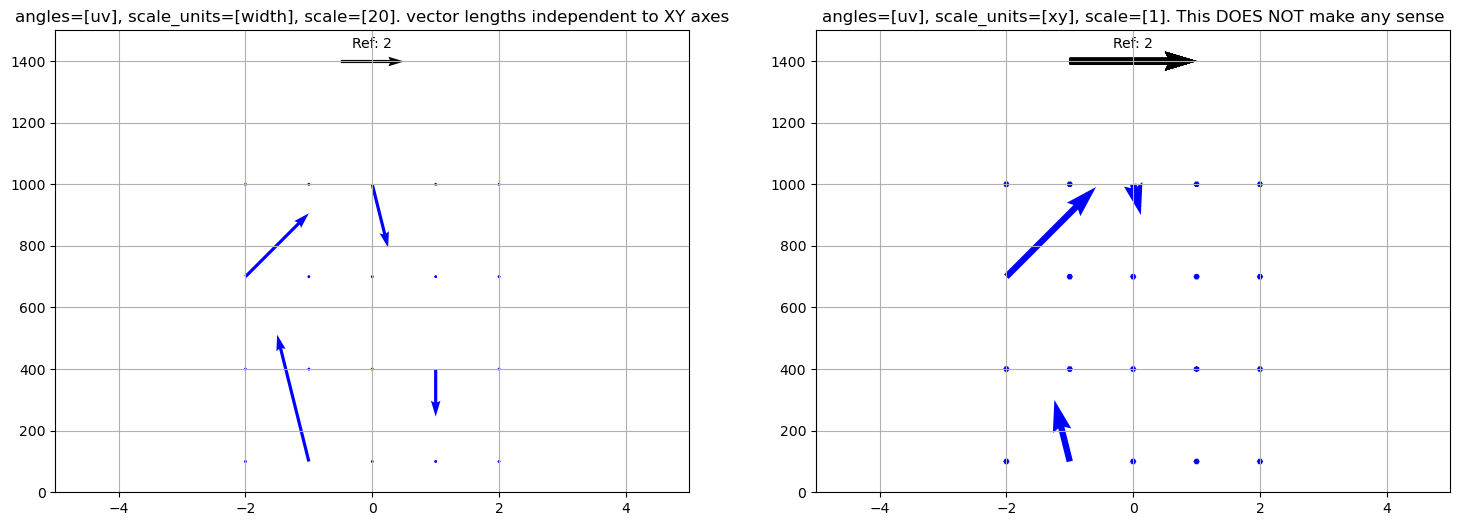

In [5]:
#--- set data
U = np.zeros_like(X)
V = np.zeros_like(Y)
U[2,0] = 2; U[3,2] = 0.5 ; U[1,3]=0;  U[0,1]=-1
V[2,0] = 2; V[3,2] = -2; V[1,3]=-1.5; V[0,1]=4

#--- plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))   # 2 row, 1 column

#--- ax1
short_note = "vector lengths independent to XY axes"
angles='uv'; scale_units='width'; scale=20; width=0.005
plot_vc (ax1, X, Y, U, V, short_note=short_note, angles=angles, scale_units=scale_units, scale=scale, width=width)

#--- ax2
short_note = "This DOES NOT make any sense"
angles='uv'; scale_units='xy'; scale=1
plot_vc (ax2, X, Y, U, V, short_note=short_note, angles=angles, scale_units=scale_units, scale=scale)

yhc.printv(U[::-1],'U','r')
yhc.printv(V[::-1],'V','g')